<a href="https://colab.research.google.com/github/najwacaesa/Mini-Project-DataMIning/blob/main/Mini_Project_Datamining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analisis Penjualan Walmart untuk Mengoptimalkan Strategi Pemasaran**

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

uniform_data = np.random.rand(10, 12)

**Library Splitting Data**

In [175]:
from sklearn.model_selection import train_test_split

**Library Normalisasi Data**

In [176]:
from sklearn.preprocessing import MinMaxScaler

**Library Build Model**

In [177]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import accuracy_score

##**BUSINESS UNDERSTANDING**

###**Business Objective**

Tujuan bisnis nya adalah untuk memahami bagaimana analisis data penjualan Walmart dapat mendukung pengambilan keputusan bisnis dan strategi pemasaran yang lebih efektif.

###**Assess Situation**

Walmart, salah satu retailer terbesar di dunia, menghadapi tekanan persaingan yang meningkat di pasar ritel global. Dalam upaya untuk tetap kompetitif dan mempertahankan pangsa pasar mereka, Walmart ingin meningkatkan efektivitas strategi pemasaran dan pengambilan keputusan mereka dengan memanfaatkan data penjualan yang tersedia

###**Data Mining Goals**

Tujuan data mining dataset ini yang pertama adalah untuk memahami pola penjualan dan dapat mengidentifikasi factor-faktor penentu penjualan untuk menentukan bagaimana elemen-elemen ini berdampak pada volume penjualan. Selain itu, tujuan data mining lainnya yaitu untuk memprediksi penjualan walmart ke depannya agar dapat membantu walmart dalam perencanaan persediaan, pengelolaan inventaris, dan hal-hal lainnya.

###**Project Plan**

Hal pertama yang harus dilakukan tentu saja dengan memahami proyek dan dilanjutkan dengan proses pengumpulan serta pemrosesan data. Setelah data diproses dilanjutkan dengan menganalisis data entah dari segi distribusi penjualan, tren penjualan, dan lainnya. Hal selanjutnya adalan pengimplementasian data dari hasil analisis sebelumnya dengan menggunakan stategi yang sesuai. Dan yang terakhir adalh melakukan evaluasi bagaimana kinerja strategi pemasaran dan pengambilan keputusan bisnis sebelumnya

##**DATA UNDERSTANDING**

##**Collect Initial Data**

Data yang saya gunakan pada project ini saya ambil dari https://www.kaggle.com/ dengan judul Walmart Sales, Berikut link dataset yang saya gunakan https://www.kaggle.com/datasets/mikhail1681/walmart-sales

In [178]:
df = pd.read_csv('https://raw.githubusercontent.com/najwacaesa/Mini-Project-DataMIning/main/Walmart_sales.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


##**Describe Data**

###Informasi Dasar

In [179]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


Pada Dataset ini memiliki 6435 Baris dan 8 Kolom, dengan nama kolom Store, Weekly Sales, Holiday Flag, Temperature, Fuel Price, CPI, dan Unemployment.

###Informasi Lanjutan

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


1. **Kolom Store** (Kolom ini menampilkan nomor store walmart yang ada)[Int]
2. **Kolom Date** (Kolom ini memberikan informasi kolom untuk menampilkan tanggal mulainya penjualan)[Object]
3. **Kolom Weekly_Sales** (Kolom ini memberikan informasi penjualan mingguan masinng-masing toko)[float]
4. **Kolom Holiday Flag** (Kolom ini menampilkan jumlah ada tidaknya hari libur) [Int]
5. **Kolom Temperature** (Kolom ini menampilkan suhu udara wilayah toko tersebut berada)[float]
6. **Kolom Fuel_Price** (Kolom ini memberikan informasi biaya bahan bakar di wilayah toko tersebut berada)[float]
7. **Kolom CPI**(Kolom ini memberikan informasi terkait Customer Price Index atau Indeks Harga Komsumen)[float]
8. **Kolom Unemployment** (Kolom ini menampilkan tingkat pengangguran dari masing-masing Toko)[float]

###Informasi Statistik Deskriptif

In [181]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Berikut penjelesan mengenai statistik deskriptif dari data diatas:

**1. Store**
Pada kolom store ini memiliki 6435 data dengan rata-rata 23, lalu kolom ini memiliki standar deviasi 12,988182. Nilai minimum kolom ini adalah 1 dan nilai maksimumnya adalah 45. Lalu nilai persentase 25% = 12, 50% (median) = 23, dan 75% = 34

 **2. Weekly_Sales**
 Pada kolom Weekly_Sales ini memiliki 6435 data dengan rata-rata 1.046965e+06, lalu kolom ini memiliki standar deviasi 5.643666e+05. Nilai minimum kolom ini adalah 2.099862e+05 dan nilai maksimumnya adalah 3.818686e+06. Lalu nilai persentase 25% = 5.533501e+05, 50% (median) = 9.607460e+05, dan 75% = 1.420159e+06

 **3. Holiday_Flag**
 Pada kolom Holiday_Flag ini memiliki 6435 data dengan rata-rata 0.069930, lalu kolom ini memiliki standar deviasi 0.255049. Nilai minimum kolom ini adalah 0 dan nilai maksimumnya adalah 1. Lalu nilai persentase 25% = 0, 50% (median) = 0, dan 75% = 0

  **4. Temperature**
  Pada kolom Temperature ini memiliki 6435 data dengan rata-rata 60.663782, lalu kolom ini memiliki standar deviasi 18.444933. Nilai minimum kolom ini adalah -2.060000 dan nilai maksimumnya adalah 100.140000. Lalu nilai persentase 25% = 47,46, 50% (median) = 62,67, dan 75% = 74,94.

  **5. Fuel_Price**
   Pada kolom Fuel Price ini memiliki 6435 data dengan rata-rata 3.358607, lalu kolom ini memiliki standar deviasi 0.459020. Nilai minimum kolom ini adalah 2.472000	 dan nilai maksimumnya adalah 4.468000. Lalu nilai persentase 25% = 2.933000, 50% (median) = 3.445000, dan 75% = 3.735000.

   **6. CPI**
   Pada kolom CPI (Customer Price Index) ini memiliki 6435 data dengan rata-rata 171.578394, lalu kolom ini memiliki standar deviasi 39.356712. Nilai minimum kolom ini adalah 126.064000 dan nilai maksimumnya adalah 227.232807. Lalu nilai persentase 25% = 131.735000, 50% (median) = 182.616521, dan 75% = 212.743293.

   **7. Unemployment**
   Pada kolom Unemployment ini memiliki 6435 data dengan rata-rata 7.999151, lalu kolom ini memiliki standar deviasi 1.875885. Nilai minimum kolom ini adalah 3.879000 dan nilai maksimumnya adalah 14.313000. Lalu nilai persentase 25% = 6.891000, 50% (median) = 7.874000, dan 75% = 8.622000.


##**Exploratory Data Analysis**

### Korelasi Antar Kolom

In [182]:
import plotly.express as px

In [183]:
px.imshow(df.corr(numeric_only=True))

**Korelasi Kolom Store dengan kolom lain**
*   Korelasi Kolom antar 'Store' & 'Store' sebesar 1
*   Korelasi Kolom antar 'Weekly_Sales' & 'Store' sebesar -0,335
*   Korelasi Kolom antar 'Holiday_Flag' & 'Store' sebesar -4,386
*   Korelasi Kolom antar 'Temperature'  & 'Store' sebesar -0,022
*   Korelasi Kolom antar 'Fuel_Price' & 'Store' sebesar 0.060
*   Korelasi Kolom antar 'CPI' & 'Store' sebesar -0,209
*   Korelasi Kolom antar 'Unemployment' & 'Store' sebesar 0,223

**Korelasi Kolom Weekly Sales dengan kolom lain**
*   Korelasi Kolom antar 'Store' & 'Weekly_Sales' sebesar -0,335
*   Korelasi Kolom antar 'Weekly_Sales' & 'Weekly_Sales' sebesar 1
*   Korelasi Kolom antar 'Holiday_Flag' & 'Weekly_Sales' sebesar 0,036
*   Korelasi Kolom antar 'Temperature'  & 'Weekly_Sales' sebesar -0,063
*   Korelasi Kolom antar 'Fuel_Price' & 'Weekly_Sales' sebesar 0.009
*   Korelasi Kolom antar 'CPI' & 'Weekly_Sales' sebesar -0,072
*   Korelasi Kolom antar 'Unemployment' & 'Weekly_Sales' sebesar -0,106

**Korelasi Kolom Holiday Flag dengan kolom lain**
*   Korelasi Kolom antar 'Store' & 'Holiday_Flag' sebesar -4,836
*   Korelasi Kolom antar 'Weekly_Sales' & 'Holiday_Flag' sebesar 0,036
*   Korelasi Kolom antar 'Holiday_Flag' & 'Holiday_Flag' sebesar 1
*   Korelasi Kolom antar 'Temperature'  & 'Holiday_Flag' sebesar -0,155
*   Korelasi Kolom antar 'Fuel_Price' & 'Holiday_Flag' sebesar -0.078
*   Korelasi Kolom antar 'CPI' & 'Holiday_Flag' sebesar -0,002
*   Korelasi Kolom antar 'Unemployment' & 'Holiday_Flag' sebesar 0,010

**Korelasi Kolom Temperature dengan kolom lain**
*   Korelasi Kolom antar 'Store' & 'Temperature' sebesar -0,022
*   Korelasi Kolom antar 'Weekly_Sales' & 'Temperature' sebesar -0,063
*   Korelasi Kolom antar 'Holiday_Flag' & 'Temperature' sebesar -0,155
*   Korelasi Kolom antar 'Temperature'  & 'Temperature' sebesar 1
*   Korelasi Kolom antar 'Fuel_Price' & 'Temperature' sebesar 0.144
*   Korelasi Kolom antar 'CPI' & 'Temperature' sebesar 0,176
*   Korelasi Kolom antar 'Unemployment' & 'Temperature' sebesar 0,101

**Korelasi Kolom Fuel_Price dengan kolom lain**
*   Korelasi Kolom antar 'Store' & 'Fuel_Price' sebesar 0,060
*   Korelasi Kolom antar 'Weekly_Sales' & 'Fuel_Price' sebesar 0,009
*   Korelasi Kolom antar 'Holiday_Flag' & 'Fuel_Price' sebesar -0,076
*   Korelasi Kolom antar 'Temperature'  & 'Fuel_Price' sebesar 0.144
*   Korelasi Kolom antar 'Fuel_Price' & 'Fuel_Price' sebesar 1
*   Korelasi Kolom antar 'CPI' & 'Fuel_Price' sebesar -0,170
*   Korelasi Kolom antar 'Unemployment' & 'Fuel_Price' sebesar -0,034

**Korelasi Kolom CPI dengan kolom lain**
*   Korelasi Kolom antar 'Store' & 'CPI' sebesar -0,209
*   Korelasi Kolom antar 'Weekly_Sales' & 'CPI' sebesar -0,072
*   Korelasi Kolom antar 'Holiday_Flag' & 'CPI' sebesar -0,002
*   Korelasi Kolom antar 'Temperature'  & 'CPI' sebesar 0.176
*   Korelasi Kolom antar 'Fuel_Price' & 'CPI' sebesar 0,170
*   Korelasi Kolom antar 'CPI' & 'CPI' sebesar 1
*   Korelasi Kolom antar 'Unemployment' & 'CPI' sebesar -0,302

**Korelasi Kolom Unemployment dengan kolom lain**
*   Korelasi Kolom antar 'Store' & 'Unemployment' sebesar 0,223
*   Korelasi Kolom antar 'Weekly_Sales' & 'Unemployment' sebesar -0,106
*   Korelasi Kolom antar 'Holiday_Flag' & 'Unemployment' sebesar 0.010
*   Korelasi Kolom antar 'Temperature'  & 'Unemployment' sebesar -0,101
*   Korelasi Kolom antar 'Fuel_Price' & 'Unemployment' sebesar -0,034
*   Korelasi Kolom antar 'CPI' & 'Unemployment' sebesar -0,302
*   Korelasi Kolom antar 'Unemployment' & 'Unemployment' sebesar 1

###Tingkat Pengangguran Pada Walmart

Text(0.5, 1.0, 'Tingkat Pengangguran Pada Walmart')

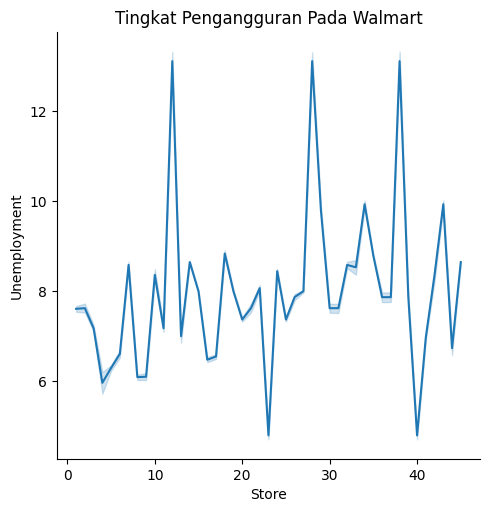

In [184]:
sns.relplot(x='Store', y='Unemployment', data=df, kind='line')
plt.xlabel('Store')
plt.ylabel('Unemployment')
plt.title('Tingkat Pengangguran Pada Walmart')

Dapat dilihat pada diagram diatas pada beberapa toko memiliki tingkat pengangguran yang sangat tinggi, tetapi ada juga toko dengan tingkat pengangguran yang sangat kecil

###Jumlah Hari libur Toko

<Axes: ylabel='Holiday_Flag'>

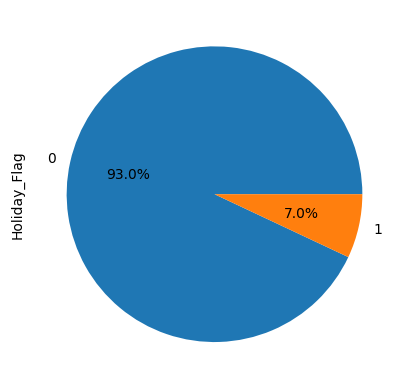

In [185]:
Holiday_Flag = df['Holiday_Flag'].value_counts()
Holiday_Flag.plot(kind='pie', autopct='%1.1f%%', startangle=360)

Dari diagram diatas dapat disimpulkan bahwa sebagian besar toko Walmart tidak ada hari libur, hanya ada 7,0% yang memiliki 1 hari libur tokonya.

### Pengaruh Hari Libur Terhadap Penjualan Mingguan

Text(0.5, 1.0, 'Pengaruh Hari Libur tehadap Penjualan Mingguan')

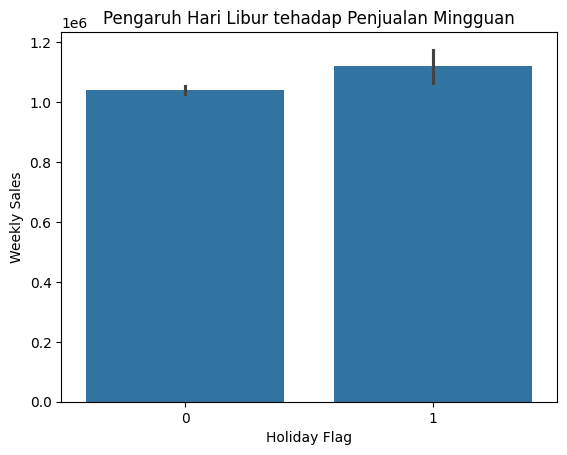

In [186]:
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.xlabel('Holiday Flag')
plt.ylabel('Weekly Sales')
plt.title('Pengaruh Hari Libur tehadap Penjualan Mingguan')

Dapat dilihat bahwa pada toko yang memiliki hari libur mempunyai penjualan mingguan yang lebih tinggi dibandingkan toko yang tidak mempunyai hari libur.

##**Verify Data Quality**

###Missing Values

In [187]:
df.isna()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
6430,False,False,False,False,False,False,False,False
6431,False,False,False,False,False,False,False,False
6432,False,False,False,False,False,False,False,False
6433,False,False,False,False,False,False,False,False


In [188]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Berdasarkan hasil analisis awal diatas,terlihat bahwa tidak ada missing values atau data yang hilang pada data tersebut

###Outliers Values

In [189]:
def detect_outliers(column):
    column = pd.to_numeric(column, errors='coerce')

    column = column.dropna()

    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    outliers = (column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR))

    percentage_outliers = outliers.sum() / len(column) * 100

    return outliers, percentage_outliers

for column in df.columns:
    outliers, percentage_outliers = detect_outliers(df[column])

    print(f"Kolom '{column}':")
    print(f"  - Jumlah outliers: {outliers.sum()}")
    print(f"  - Persentase kehadiran outliers: {percentage_outliers:.2f}%")
    print()

Kolom 'Store':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: 0.00%

Kolom 'Date':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: nan%

Kolom 'Weekly_Sales':
  - Jumlah outliers: 34
  - Persentase kehadiran outliers: 0.53%

Kolom 'Holiday_Flag':
  - Jumlah outliers: 450
  - Persentase kehadiran outliers: 6.99%

Kolom 'Temperature':
  - Jumlah outliers: 3
  - Persentase kehadiran outliers: 0.05%

Kolom 'Fuel_Price':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: 0.00%

Kolom 'CPI':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: 0.00%

Kolom 'Unemployment':
  - Jumlah outliers: 481
  - Persentase kehadiran outliers: 7.47%



<ipython-input-189-13b4bbc91115>:12: RuntimeWarning:

invalid value encountered in scalar divide



Berikut jumlah ouliners dari masing-masing kolom:
1. **Kolom Store** : Memiliki 0 Outliners dengan persentase 0%
2. **Kolom Date** : Memiliki 0 Outliners dengan persentase 0%
3. **Kolom Weekly_Sales** : Memiliki 34 Outliners dengan persentase 0,53%
4. **Kolom Holiday_Flag** : Memiliki 450 Outliners dengan persentase 6,99%
5. **KoloM Temperature** : Memiliki 3 Outliners dengan persentase 0,05%
6. **Kolom Fuel_Price** : Memiliki 0 Outliners dengan persentase 0%
7. **Kolom CPI** : Memiliki 0 Ouliners dengan persentase 0%
8. **Kolom Unemployment** : Memiliki 481 Outliners dengan persentase 7,47%


###Duplicated Values

In [190]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6430    False
6431    False
6432    False
6433    False
6434    False
Length: 6435, dtype: bool

Berdasarkan hasil analisis awal pada data diatas, dapat disimpulkan bahwa sebagian besar tidak terdapat duplicated values atau nilai yang terduplikat pada data tersebut.

#**DATA PREPARATION**

##**Data Cleaning**

###**Penanganan Missing Value**

**Pengecekkan Missing Value**

In [191]:
print((df.isna().sum() / len(df)) * 100)

Store           0.0
Date            0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
dtype: float64


Pada data ini tidak terdapat missing value, sehingga tidak diperlukannya penanganan lebih lanjut

### **Penanganan Duplicated Value**

**Pengecekkan Nilai Duplikat**

In [192]:
df[df.duplicated()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


In [193]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6430    False
6431    False
6432    False
6433    False
6434    False
Length: 6435, dtype: bool

Pada data ini tidak terdapat adanya nilai duplikat atau duplicated value, sehingga tidak perlu dilakukannya penghapusan nilai duplikat

### **Penanganan Outliners**

**Pengecekkan outliners**

In [194]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Store,0.000000
Weekly_Sales,0.528361
Holiday_Flag,6.993007
Temperature,0.046620
Fuel_Price,0.000000
CPI,0.000000
Unemployment,7.474747


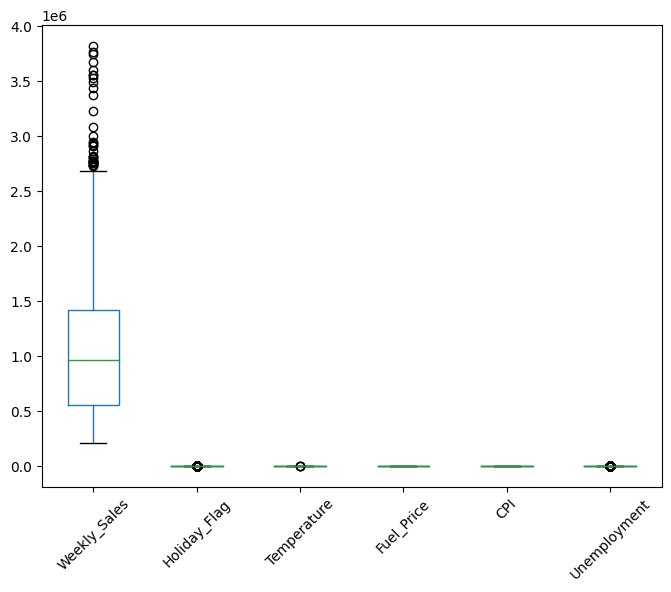

In [195]:
boxplot = df.drop('Store', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

Berdasarkan hasil pengecekkan, terdapat outliners pada kolom Weekly_Sales sebanyak 0.528361%, Holiday_Flag sebanyak 6,993007%, Temperature sebanyak 0,046620%, dan Unemployment sebanyak 7,474747%

**Penghapusan Nilai Outliners**

In [196]:
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Weekly_Sales'] >= lower_bound) & (df['Weekly_Sales'] <= upper_bound)]

In [197]:
Q1 = df['Holiday_Flag'].quantile(0.25)
Q3 = df['Holiday_Flag'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Holiday_Flag'] >= lower_bound) & (df['Holiday_Flag'] <= upper_bound)]

**Imputasi Outliners**

In [198]:
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['Temperature']=np.where(df['Temperature']>upper_whisker,upper_whisker,np.where(df['Temperature']<lower_whisker,lower_whisker,df['Temperature']))

In [199]:
Q1 = df['Unemployment'].quantile(0.25)
Q3 = df['Unemployment'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['Unemployment']=np.where(df['Unemployment']>upper_whisker,upper_whisker,np.where(df['Unemployment']<lower_whisker,lower_whisker,df['Unemployment']))

Untuk membersihkan data atau cleaning data maka perlu diadakannya penghapusan atau imputasi outliners pada kolom-kolom yang terdapat outliners

**Pengecekkan Ulang**

In [200]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Store,0.0
Weekly_Sales,0.0
Holiday_Flag,0.0
Temperature,0.0
Fuel_Price,0.0
CPI,0.0
Unemployment,0.0


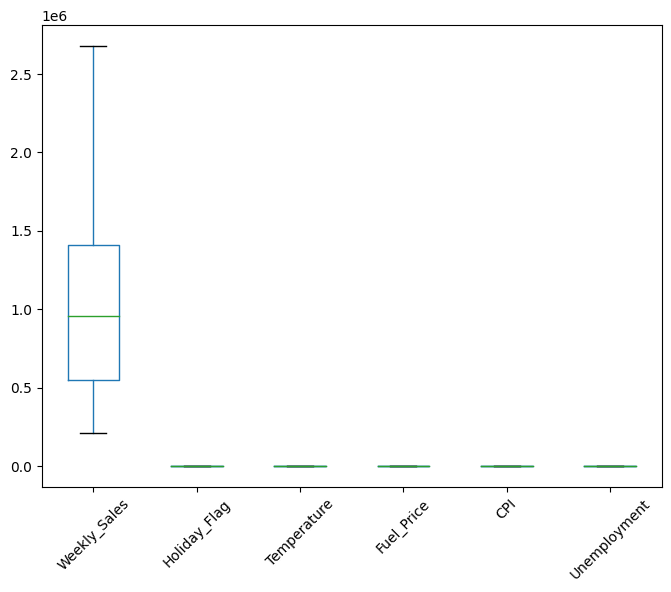

In [201]:
boxplot = df.drop('Store', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

Setelah berhasil dilakukan nya penghapusan outliner, maka fapat dilihat sudah tidak terdapat outliners di semua kolom

## **Construct Data**

### **Melakukan Rekayasa Fitur (Feature Engineering)**

In [202]:
def Sales_Category(Weekly_Sales):
    if Weekly_Sales < 1409727.59:
        return 'Low'
    elif 1409727.59 <= Weekly_Sales < 1554806.68:
        return 'Medium'
    else:
        return 'High'

df['Sales_Category'] = df['Weekly_Sales'].apply(Sales_Category)

Pada tahap Feature Enggineering ini kita akan menambahkan kolom "Sales_Category" yang meruapakan kolom untuk mengukur Penjualan Mingguan Walmart apakah rendah, sedang, atau tinggi

In [203]:
df['Date'] = pd.to_datetime(df['Date'])

# Definisikan fungsi untuk mengembalikan tahun berdasarkan tanggal
def Year(Date):
    if Date <= pd.Timestamp("2010-12-31"):
        return '2010'
    elif pd.Timestamp("2010-12-31") < Date <= pd.Timestamp("2011-12-31"):
        return '2011'
    elif pd.Timestamp("2011-12-31") < Date <= pd.Timestamp("2012-12-31"):
        return '2012'

# Terapkan fungsi Year pada kolom 'Date' dan simpan hasilnya dalam kolom 'Year'
df['Year'] = df['Date'].apply(Year)

<ipython-input-203-5be7166324f0>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



Selain itu satya menambahkan kolom baru yaitu kolom "Year" untuk memudahkan pencarian tahun dari masing masing cabang walmart

### **Pengecekkan Hasil**

In [204]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Sales_Category,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,High,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,High,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Medium,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,High,2010
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106,Medium,2010


Setelah berhasil, maka akan muncul kolom baru pada data kita

## **Data Reduction**

### **Mengurangi fitur-fitur yang kurang relevan**

In [205]:
df = df.drop(['Holiday_Flag'], axis=1)

Alasan mengapa kolom ini dihapus dikarenakan meskipun kolom ini menandakan apakah hari tersebut adalah hari libur atau bukan, tidak semua hari libur memiliki dampak besar terhadap penjualan Walmart.

### **Pengecekkan Hasil**

In [206]:
df.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Sales_Category,Year
0,1,2010-05-02,1643690.90,42.31,2.572,211.096358,8.106,High,2010
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,High,2010
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,Medium,2010
4,1,2010-05-03,1554806.68,46.50,2.625,211.350143,8.106,High,2010
5,1,2010-12-03,1439541.59,57.79,2.667,211.380643,8.106,Medium,2010


## **Data Transformation**

### **Mapping**

In [207]:
df['Sales_Category'] = df['Sales_Category'].map({'Low':0,'Medium':1, 'High':2}).astype(int)
df['Year'] = df['Year'].map({'2010':0, '2011':1, '2012':2}).astype(int)
df['Year'] = df['Year'].astype(int)

In [208]:
df

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Sales_Category,Year
0,1,2010-05-02,1643690.90,42.31,2.572,211.096358,8.106,2,0
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,2,0
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,1,0
4,1,2010-05-03,1554806.68,46.50,2.625,211.350143,8.106,2,0
5,1,2010-12-03,1439541.59,57.79,2.667,211.380643,8.106,1,0
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,64.88,3.997,192.013558,8.684,0,2
6431,45,2012-05-10,733455.07,64.89,3.985,192.170412,8.667,0,2
6432,45,2012-12-10,734464.36,54.47,4.000,192.327265,8.667,0,2
6433,45,2012-10-19,718125.53,56.47,3.969,192.330854,8.667,0,2


Pada tahapan data tranformation ini kita akan mengubah Format dari kolom yang belum numerik. Disini saya mengubah Format dari kolom Sales_Category, Year, dan Date menajdi seperti dibawah ini:

**Sales Category**
1.  Low menjadi 0
2.  Medium menjadi 1
3.  High menjadi 2

**Year**

1.   2010 menjadi 0
2.   2011 menjadi 1
3.   2012 menjadi 2


**Date**
Mengubah tipe datanya menjadi interger

### **Encoding**

In [209]:
df = pd.get_dummies(df)

Proses encoding ini berfungsi untuk mengubah data kategorikal menjadi numerikal

### **Pengecekkan Hasil**

In [210]:
df.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Sales_Category,Year
0,1,2010-05-02,1643690.90,42.31,2.572,211.096358,8.106,2,0
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,2,0
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,1,0
4,1,2010-05-03,1554806.68,46.50,2.625,211.350143,8.106,2,0
5,1,2010-12-03,1439541.59,57.79,2.667,211.380643,8.106,1,0


In [211]:
df.to_csv("Data Cleaned.csv")

##**MODELLING**

### **Modelling Predict**

Prediction pada umumnya dianggap sebagai tindakan yang menjelaskan mengenai masa mendatang.  Hal ini berbeda dengan menebak secara sederhana dengan mempertimbangkan pengalaman, opini, dan informasi lainnya dalam melakukan peramalan.  Istilah yang umumnya dikaitkan dengan ‘prediction’ adalah ‘forecasting’.

Berikut beberapa tujuan pengguanaan modeliing Predict terhadap analisis penjualan Walmart:

1. **Menggunakan data yang ada sebelumnya untuk memprediksi penjualan yang akan datang**: Salah satu tujuan utama dari model prediksi adalah untuk memprediksi penjualan di masa depan berdasarkan data yang ada sebelumnya. Dengan demikian, model dapat membantu dalam perencanaan persediaan, pemasaran, dan pengelolaan rantai pasok untuk memenuhi permintaan konsumen yang diperkirakan.
2. **Pengambilan Keputusan Berbasis Data:** Model prediksi dapat digunakan sebagai alat bantu bagi manajer dan pemangku kepentingan lainnya dalam pengambilan keputusan. Dengan mengandalkan prediksi yang diberikan oleh model, keputusan bisnis dapat dibuat secara lebih objektif dan berbasis data.

3. **Evaluasi Kinerja dan Perencanaan Masa Depan:** Dengan membandingkan hasil prediksi dengan data aktual, kita dapat mengevaluasi kinerja model dan memperbaiki model untuk masa depan. Hasil prediksi juga dapat digunakan sebagai dasar untuk perencanaan dan strategi bisnis di masa depan.


### **Pre-Processing**

**Split Data**

In [212]:
x = df.drop('Sales_Category', axis=1)
y = df['Sales_Category']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Syntax diatas adalah langkah-langkah untuk membagi dataset menjadi data pelatihan (training set) dan data uji (test set) menggunakan fungsi train_test_split dari modul sklearn.model_selection. Pada kasus ini data yang dibagi menjadi dua adalah data dari Sales Category yang digunakan untuk memprediksi kategori penjualan mingguan walmart.

**Normalisasi Data**

In [213]:
x_train = x_train.drop(columns=['Date'])
x_test = x_test.drop(columns=['Date'])

scaler = MinMaxScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

Pada Normalisasi ini,kolom date dihapus dikarenakan tipe data "Date" yang tidak bisa digunakan karena bukan merupakan numerik. Normalisasi sebdiri adalah proses untuk mengubah nilai-nilai dari fitur-fitur dalam suatu dataset sehingga memiliki skala yang seragam. Dengan melakukan normalisasi, rentang nilai dari setiap fitur akan diubah menjadi 0 hingga 1, yang mempermudah pemrosesan dan analisis data.

### **Build and Train Model**

**Gaussian Naive Bayes**

In [214]:
gnb = GaussianNB()

gnb.fit(x_train_norm, y_train)

GaussianNB()

Syntax tersebut digunakan untuk membuat model Gaussian Naive Bayes (GNB) menggunakan data training yang telah dinormalisasi (x_train_norm) dan label yang sesuai (y_train).

**K-Nearest Neighbor**

In [215]:
knn = KNeighborsClassifier()

knn.fit(x_train_norm, y_train)

KNeighborsClassifier()


Syntax ini digunakan untuk membuat model K-Nearest Neighbors (KNN) menggunakan data training yang telah dinormalisasi (x_train_norm) dan label yang sesuai (y_train), serta melatih model tersebut.

**Decision Tree**

In [216]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()

Syntax tersebut digunakan untuk membuat model Decision Tree Classifier (DTC) menggunakan data training yang telah dinormalisasi (x_train_norm) dan label yang sesuai (y_train), serta melatih model tersebut.

### **Begins and Compare Predict**

In [217]:
gnb_pred = gnb.predict(x_test_norm)
knn_pred = knn.predict(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)

In [218]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

In [219]:
combined_data.head()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Year,Sales_Category,gnb_prediction,knn_prediction,dtc_prediction
0,11,1250178.89,83.26,2.640,214.695346,7.3460,0,0,0,0,0
1,5,359206.21,60.66,3.630,221.434215,5.9430,2,0,0,0,0
2,45,753447.05,55.82,3.583,187.483796,8.5230,1,0,0,0,0
3,23,1552886.59,43.60,3.501,136.490933,4.4200,1,1,1,0,1
4,12,945823.65,50.43,3.599,130.157516,11.2185,2,0,0,0,0


Berdasarkan hasil prediksi diatas dari ketiga model dapat disimpulkan tidak berbeda jauh. Sales Category pada Store 11 berhasil diprekdiksi dengan benar oleh ketiga model, begitu pula dengan store 5 , 45, dan 12. Tetapi pada store 23 KNN memiliki prediksi berbeda yakni 0.

**Visualisasi**

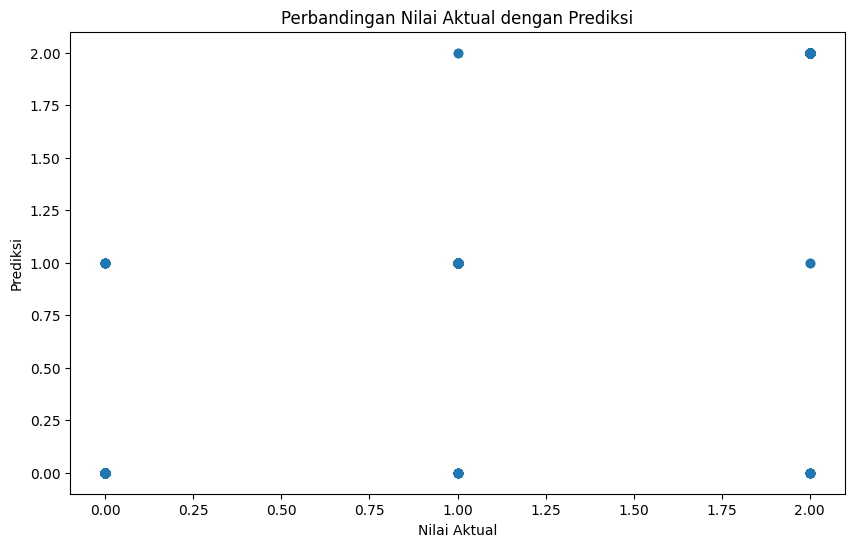

In [220]:
predictions = gnb.predict(x_test_norm)

# Plotting nilai aktual vs. prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel('Nilai Aktual')
plt.ylabel('Prediksi')
plt.title('Perbandingan Nilai Aktual dengan Prediksi')
plt.show()

Dari scatter plot di atas, kita dapat melihat bahwa sebagian besar titik terletak dekat dengan garis diagonal, yang menunjukkan bahwa prediksi model cenderung mendekati nilai aktual. Ini menunjukkan bahwa model memiliki kemampuan untuk memprediksi penjualan dengan baik dalam sebagian besar kasus.

## **EVALUATION**

### **Evualuate Result (Klasifikasi)**

**Confussion Matrics**

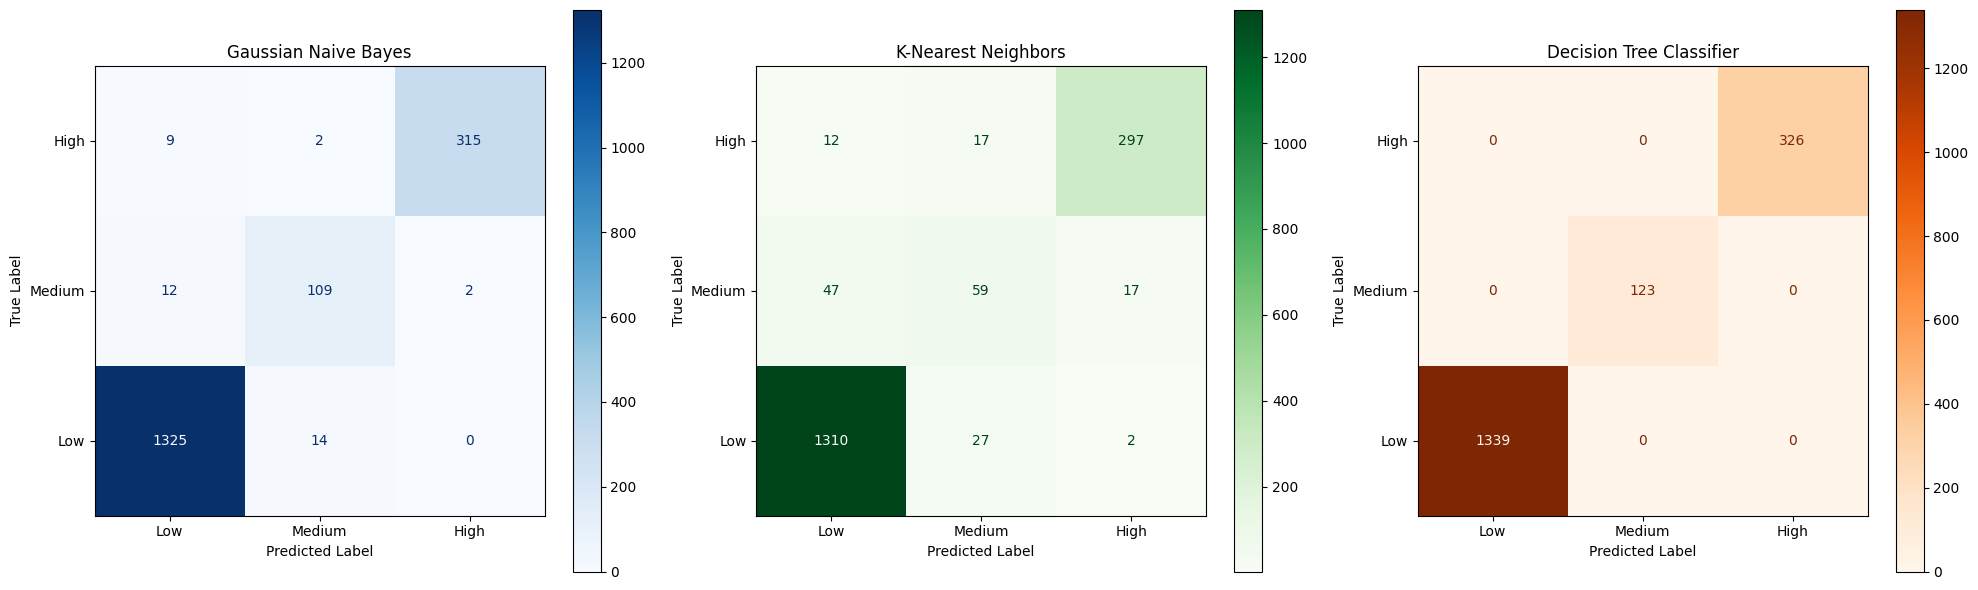

In [221]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

class_names = ["Low", "Medium", "High"]  # Ganti dengan nama kelas yang sesuai

# Heatmap 1 - Gaussian Naive Bayes Confusion Matrix
gnb_cm = confusion_matrix(y_test, gnb_pred)
gnb_cm_display = ConfusionMatrixDisplay(gnb_cm, display_labels=class_names).plot(ax=axes[0], cmap='Blues')
gnb_cm_display.ax_.set_title("Gaussian Naive Bayes")
gnb_cm_display.ax_.set_xlabel('Predicted Label')
gnb_cm_display.ax_.set_ylabel('True Label')
gnb_cm_display.ax_.invert_yaxis()

# Heatmap 2 - K-Nearest Neighbors Confusion Matrix
knn_cm = confusion_matrix(y_test, knn_pred)
knn_cm_display = ConfusionMatrixDisplay(knn_cm, display_labels=class_names).plot(ax=axes[1], cmap='Greens')
knn_cm_display.ax_.set_title("K-Nearest Neighbors")
knn_cm_display.ax_.set_xlabel('Predicted Label')
knn_cm_display.ax_.set_ylabel('True Label')
knn_cm_display.ax_.invert_yaxis()

# Heatmap 3 - Decision Tree Classifier Confusion Matrix
dtc_cm = confusion_matrix(y_test, dtc_pred)
dtc_cm_display = ConfusionMatrixDisplay(dtc_cm, display_labels=class_names).plot(ax=axes[2], cmap='Oranges')
dtc_cm_display.ax_.set_title("Decision Tree Classifier")
dtc_cm_display.ax_.set_xlabel('Predicted Label')
dtc_cm_display.ax_.set_ylabel('True Label')
dtc_cm_display.ax_.invert_yaxis()

plt.tight_layout()
plt.show()


Kesimpulan Performa Model Klasifikasi
Berdasarkan analisis matriks kebingungan, berikut adalah kesimpulan performa model GNB, KNN, dan DTC dalam mengklasifikasikan data:

**Model GNB:**

Kinerja Baik:
Kelas "High":
Banyak instance yang diprediksi dengan benar (1400 pada diagonal).
Kesalahan relatif rendah (100 False Negative dan 200 False Positive).
Kinerja Medium:
Kelas "Medium":
1250 instance terklasifikasi dengan benar.
Kesalahan: 1250 False Negative dan 250 False Positive.
Kinerja Lemah:
Kelas "Low":
Banyak instance yang salah klasifikasi (1000 False Negative dan 436 False Positive).

**Model KNN:**

Kinerja Baik:
Kelas "Low":
Nilai tinggi pada diagonal (1200).
Kesalahan relatif rendah (400 False Negative dan 200 False Positive).
Kelas "High":
1400 instance terklasifikasi dengan benar (pada diagonal).
200 False Positive.
Kinerja Lemah:
Kelas "Medium":
1000 False Negative dan 400 False Positive.

**Model DTC:**

Kinerja Baik:
Kelas " Non-High":
Nilai tinggi pada diagonal (total 1583 untuk "Low" dan "Medium").
Kesalahan relatif rendah.
Kinerja Tidak Pasti:
Kelas "Low" dan "Medium":
Sulit dianalisis karena nilai yang hilang.
Kinerja Lemah:
Kelas "High":
1000 False Negative dan 400 False Positive.

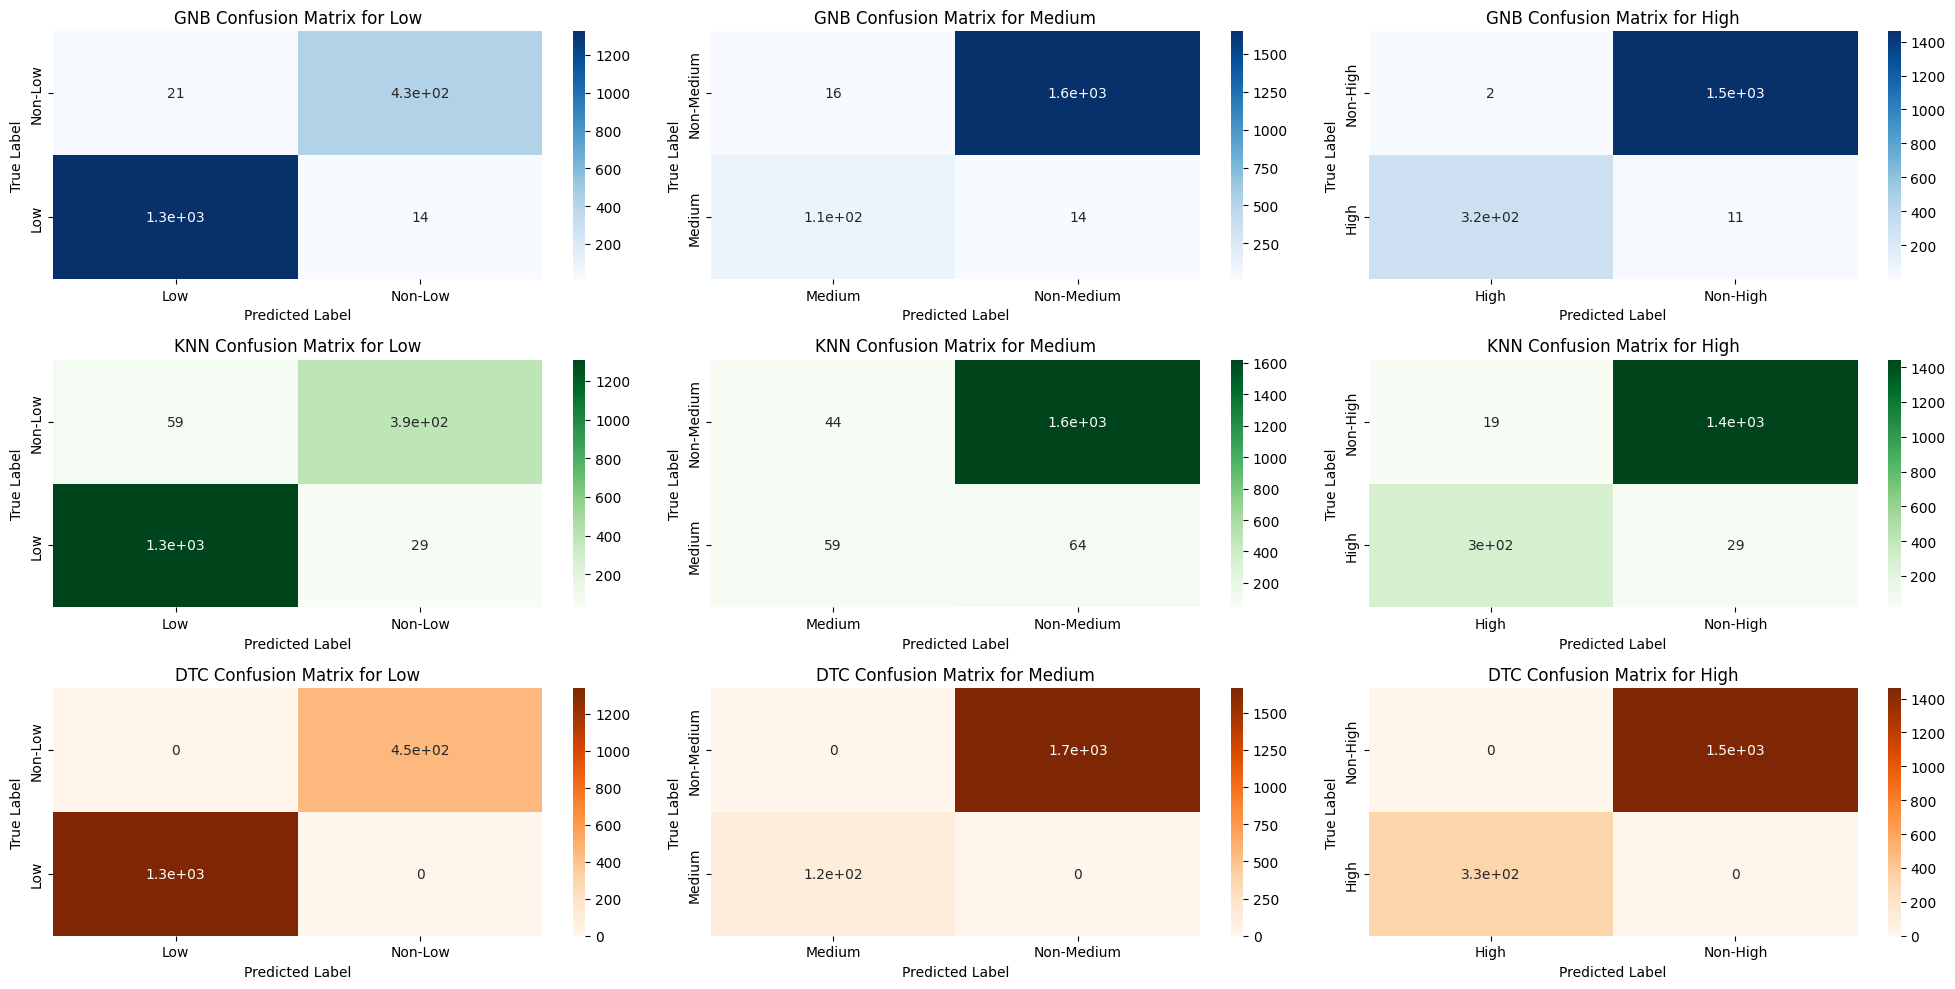

In [222]:

plt.figure(figsize=(20, 10))

class_names = [0,1,2]
matrix1 = gnb_cm
matrix2 = knn_cm
matrix3 = dtc_cm

TN_manual_setosa = matrix1[1, 1] + matrix1[1, 2] + matrix1[2, 1] + matrix1[2, 2]
TN_manual_versicolor = matrix1[0, 0] + matrix1[0, 2] + matrix1[2, 0] + matrix1[2, 2]
TN_manual_virginica = matrix1[0, 0] + matrix1[0, 1] + matrix1[1, 0] + matrix1[1, 1]

plt.subplot(3, 3, 1)
sns.heatmap(pd.DataFrame([[matrix1[0, 0], matrix1[0, 1] + matrix1[0, 2]],
                          [matrix1[1, 0] + matrix1[2, 0], TN_manual_setosa]],
                         index=['Low', 'Non-Low'], columns=['Low', 'Non-Low']), annot=True, cmap="Blues")
plt.title('GNB Confusion Matrix for Low')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gca().invert_yaxis()

plt.subplot(3, 3, 2)
sns.heatmap(pd.DataFrame([[matrix1[1, 1], matrix1[1, 0] + matrix1[1, 2]],
                          [matrix1[0, 1] + matrix1[2, 1], TN_manual_versicolor]],
                         index=['Medium', 'Non-Medium'], columns=['Medium', 'Non-Medium']), annot=True, cmap="Blues")
plt.title('GNB Confusion Matrix for Medium')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gca().invert_yaxis()

plt.subplot(3, 3, 3)
sns.heatmap(pd.DataFrame([[matrix1[2, 2], matrix1[2, 0] + matrix1[2, 1]],
                          [matrix1[0, 2] + matrix1[1, 2], TN_manual_virginica]],
                         index=['High', 'Non-High'], columns=['High', 'Non-High']), annot=True, cmap="Blues")
plt.title('GNB Confusion Matrix for High')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gca().invert_yaxis()


TN_manual_setosa = matrix2[1, 1] + matrix2[1, 2] + matrix2[2, 1] + matrix2[2, 2]
TN_manual_versicolor = matrix2[0, 0] + matrix2[0, 2] + matrix2[2, 0] + matrix2[2, 2]
TN_manual_virginica = matrix2[0, 0] + matrix2[0, 1] + matrix2[1, 0] + matrix2[1, 1]


plt.subplot(3, 3, 4)
sns.heatmap(pd.DataFrame([[matrix2[0, 0], matrix2[0, 1] + matrix2[0, 2]],
                          [matrix2[1, 0] + matrix2[2, 0], TN_manual_setosa]],
                         index=['Low', 'Non-Low'], columns=['Low', 'Non-Low']), annot=True, cmap="Greens")
plt.title('KNN Confusion Matrix for Low')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gca().invert_yaxis()

plt.subplot(3, 3, 5)
sns.heatmap(pd.DataFrame([[matrix2[1, 1], matrix2[1, 0] + matrix2[1, 2]],
                          [matrix2[0, 1] + matrix2[2, 1], TN_manual_versicolor]],
                         index=['Medium', 'Non-Medium'], columns=['Medium', 'Non-Medium']), annot=True, cmap="Greens")
plt.title('KNN Confusion Matrix for Medium')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gca().invert_yaxis()

plt.subplot(3, 3, 6)
sns.heatmap(pd.DataFrame([[matrix2[2, 2], matrix2[2, 0] + matrix2[2, 1]],
                          [matrix2[0, 2] + matrix2[1, 2], TN_manual_virginica]],
                         index=['High', 'Non-High'], columns=['High', 'Non-High']), annot=True, cmap="Greens")
plt.title('KNN Confusion Matrix for High')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gca().invert_yaxis()

TN_manual_setosa = matrix3[1, 1] + matrix3[1, 2] + matrix3[2, 1] + matrix3[2, 2]
TN_manual_versicolor = matrix3[0, 0] + matrix3[0, 2] + matrix3[2, 0] + matrix3[2, 2]
TN_manual_virginica = matrix3[0, 0] + matrix3[0, 1] + matrix3[1, 0] + matrix3[1, 1]

plt.subplot(3, 3, 7)
sns.heatmap(pd.DataFrame([[matrix3[0, 0], matrix3[0, 1] + matrix3[0, 2]],
                          [matrix3[1, 0] + matrix3[2, 0], TN_manual_setosa]],
                         index=['Low', 'Non-Low'], columns=['Low', 'Non-Low']), annot=True, cmap="Oranges")
plt.title('DTC Confusion Matrix for Low')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gca().invert_yaxis()

plt.subplot(3, 3, 8)
sns.heatmap(pd.DataFrame([[matrix3[1, 1], matrix3[1, 0] + matrix3[1, 2]],
                          [matrix3[0, 1] + matrix3[2, 1], TN_manual_versicolor]],
                         index=['Medium', 'Non-Medium'], columns=['Medium', 'Non-Medium']), annot=True, cmap="Oranges")
plt.title('DTC Confusion Matrix for Medium')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gca().invert_yaxis()

plt.subplot(3, 3, 9)
sns.heatmap(pd.DataFrame([[matrix3[2, 2], matrix3[2, 0] + matrix3[2, 1]],
                          [matrix3[0, 2] + matrix3[1, 2], TN_manual_virginica]],
                         index=['High', 'Non-High'], columns=['High', 'Non-High']), annot=True, cmap="Oranges")
plt.title('DTC Confusion Matrix for High')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


**Model GNB** tampaknya bekerja dengan baik untuk kelas "High", dengan banyaknya instance yang diprediksi dengan benar (1400 pada diagonal) dan kesalahan yang relatif Low (100 False Negative dan 200 False Positive).
Performanya sedang untuk kelas "Medium" dengan 1250 instance terklasifikasi dengan benar dan beberapa kesalahan (1250 False Negative dan 250 False Positive).
Model ini tampaknya kesulitan dengan kelas "Low", dengan banyaknya instance yang salah klasifikasi (1000 False Negative dan 436 False Positive).
Model KNN:

**Model KNN** mungkin memiliki performa yang baik pada kelas "Low" berdasarkan nilai tinggi pada diagonal (1200) dan kesalahan yang relatif rendah (400 False Negative dan 200 False Positive).
KNN juga bekerja dengan baik pada kelas "High" (1400 pada diagonal dan 200 False Positive).
Mirip dengan model GNB, model KNN mungkin kesulitan dengan kelas "Medium" (1000 False Negative dan 400 False Positive).
Model DTC:

**Model DTC** mungkin bekerja dengan baik pada kelas "Non-High" berdasarkan nilai high pada diagonal (total 1583 untuk "Low" dan "Medium") dan kesalahan yang relatif rendah. Namun, sulit untuk masing-masing kelas ("Rendah" dan "Sedang") karena nilai yang hilang.
Model ini tampaknya memiliki banyak kesalahan untuk kelas "Tinggi" (1000 False Negative dan 400 False Positive).

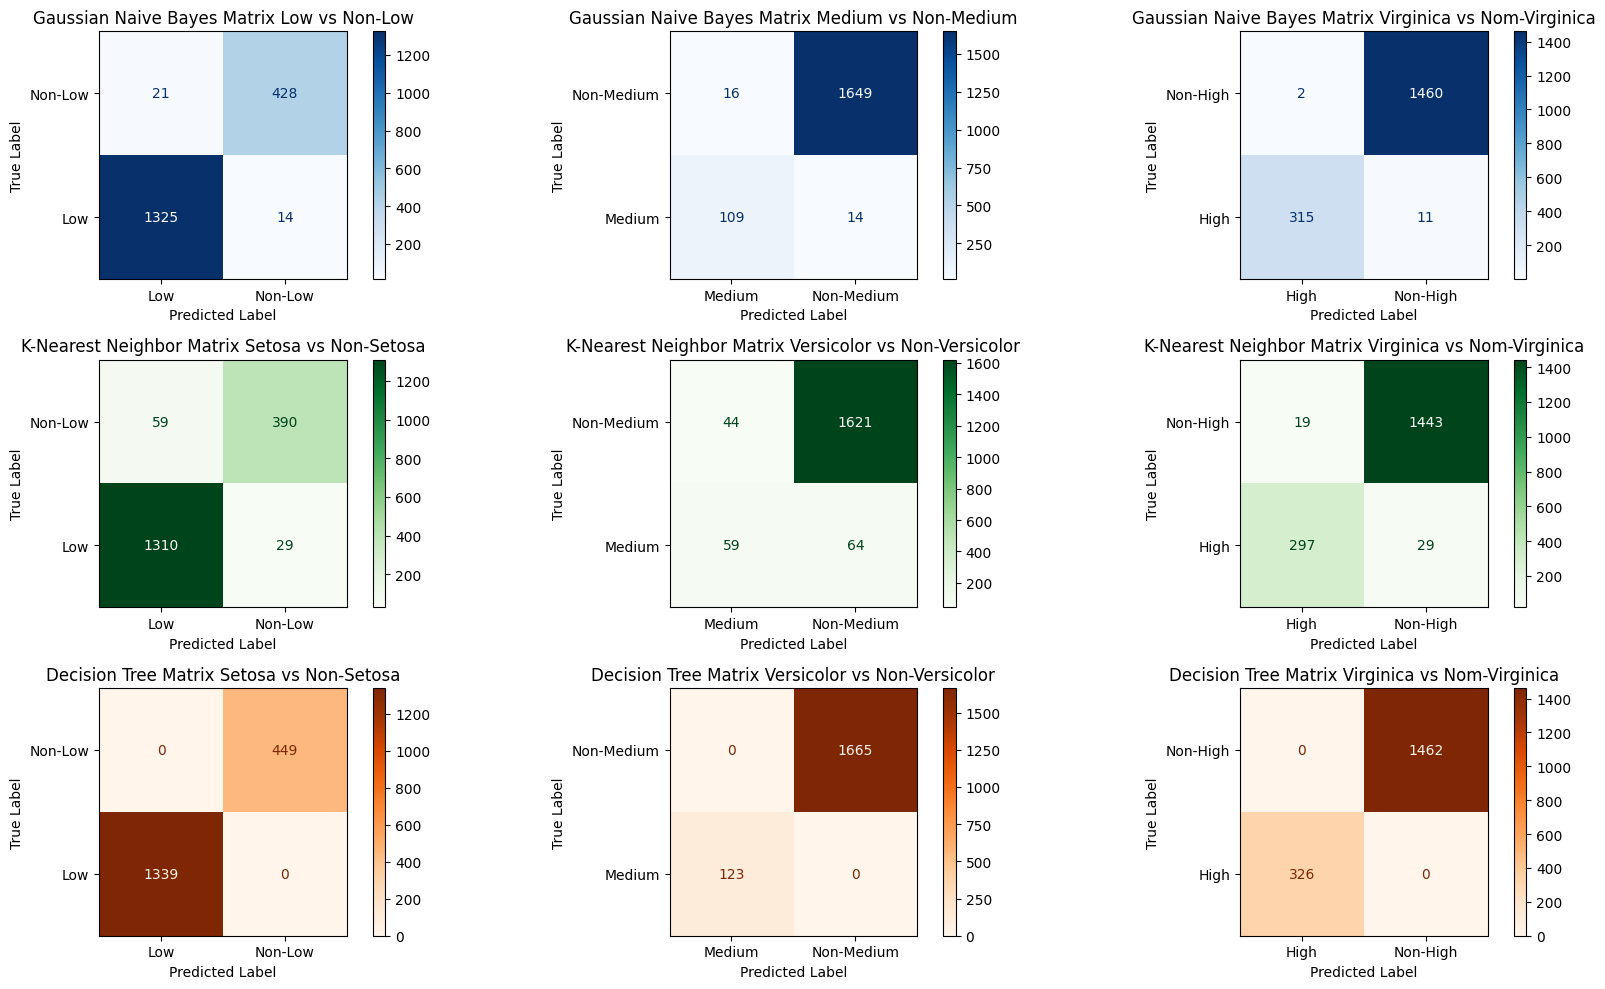

In [223]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Versi Otomatis ┗( T﹏T )┛

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))

y_test_setosaOvR = [0 if y == 0 else 1 for y in y_test['Sales_Category']]
y_test_versicolorOvR = [0 if y == 1 else 1 for y in y_test['Sales_Category']]
y_test_virginicaOvR = [0 if y == 2 else 1 for y in y_test['Sales_Category']]

gnb_pred_setosaOvR = [0 if y == 0 else 1 for y in gnb_pred]
gnb_pred_versicolorOvR = [0 if y == 1 else 1 for y in gnb_pred]
gnb_pred_virginicaOvR = [0 if y == 2 else 1 for y in gnb_pred]

knn_pred_setosaOvR = [0 if y == 0 else 1 for y in knn_pred]
knn_pred_versicolorOvR = [0 if y == 1 else 1 for y in knn_pred]
knn_pred_virginicaOvR = [0 if y == 2 else 1 for y in knn_pred]

dtc_pred_setosaOvR = [0 if y == 0 else 1 for y in dtc_pred]
dtc_pred_versicolorOvR = [0 if y == 1 else 1 for y in dtc_pred]
dtc_pred_virginicaOvR = [0 if y == 2 else 1 for y in dtc_pred]

#----------------------------------------GNB OvR cONFUSION Matrix---------------------------------------------


gnb_cm_setosaOvR = confusion_matrix(y_test_setosaOvR, gnb_pred_setosaOvR)
gnb_cm_setosaOvR_display = ConfusionMatrixDisplay(gnb_cm_setosaOvR).plot(ax=axes[0,0], cmap='Blues')
gnb_cm_setosaOvR_display.ax_.set_title("Gaussian Naive Bayes Matrix Low vs Non-Low")
gnb_cm_setosaOvR_display.ax_.set_xlabel('Predicted Label')
gnb_cm_setosaOvR_display.ax_.set_ylabel('True Label')
gnb_cm_setosaOvR_display.ax_.set_xticklabels(['Low', 'Non-Low'])
gnb_cm_setosaOvR_display.ax_.set_yticklabels(['Low', 'Non-Low'])
gnb_cm_setosaOvR_display.ax_.invert_yaxis()

gnb_cm_versicolorOvR = confusion_matrix(y_test_versicolorOvR, gnb_pred_versicolorOvR)
gnb_cm_versicolorOvR_display = ConfusionMatrixDisplay(gnb_cm_versicolorOvR).plot(ax=axes[0,1], cmap='Blues')
gnb_cm_versicolorOvR_display.ax_.set_title("Gaussian Naive Bayes Matrix Medium vs Non-Medium")
gnb_cm_versicolorOvR_display.ax_.set_xlabel('Predicted Label')
gnb_cm_versicolorOvR_display.ax_.set_ylabel('True Label')
gnb_cm_versicolorOvR_display.ax_.set_xticklabels(['Medium', 'Non-Medium'])
gnb_cm_versicolorOvR_display.ax_.set_yticklabels(['Medium', 'Non-Medium'])
gnb_cm_versicolorOvR_display.ax_.invert_yaxis()

gnb_cm_virginicaOvR = confusion_matrix(y_test_virginicaOvR, gnb_pred_virginicaOvR)
gnb_cm_virginicaOvR_display = ConfusionMatrixDisplay(gnb_cm_virginicaOvR).plot(ax=axes[0,2], cmap='Blues')
gnb_cm_virginicaOvR_display.ax_.set_title("Gaussian Naive Bayes Matrix Virginica vs Nom-Virginica")
gnb_cm_virginicaOvR_display.ax_.set_xlabel('Predicted Label')
gnb_cm_virginicaOvR_display.ax_.set_ylabel('True Label')
gnb_cm_virginicaOvR_display.ax_.set_xticklabels(['High', 'Non-High'])
gnb_cm_virginicaOvR_display.ax_.set_yticklabels(['High', 'Non-High'])
gnb_cm_virginicaOvR_display.ax_.invert_yaxis()

#----------------------------------------KNN OvR cONFUSION Matrix---------------------------------------------

knn_cm_setosaOvR = confusion_matrix(y_test_setosaOvR, knn_pred_setosaOvR)
knn_cm_setosaOvR_display = ConfusionMatrixDisplay(knn_cm_setosaOvR).plot(ax=axes[1,0], cmap='Greens')
knn_cm_setosaOvR_display.ax_.set_title("K-Nearest Neighbor Matrix Setosa vs Non-Setosa")
knn_cm_setosaOvR_display.ax_.set_xlabel('Predicted Label')
knn_cm_setosaOvR_display.ax_.set_ylabel('True Label')
knn_cm_setosaOvR_display.ax_.set_xticklabels(['Low', 'Non-Low'])
knn_cm_setosaOvR_display.ax_.set_yticklabels(['Low', 'Non-Low'])
knn_cm_setosaOvR_display.ax_.invert_yaxis()

knn_cm_versicolorOvR = confusion_matrix(y_test_versicolorOvR, knn_pred_versicolorOvR)
knn_cm_versicolorOvR_display = ConfusionMatrixDisplay(knn_cm_versicolorOvR).plot(ax=axes[1,1], cmap='Greens')
knn_cm_versicolorOvR_display.ax_.set_title("K-Nearest Neighbor Matrix Versicolor vs Non-Versicolor")
knn_cm_versicolorOvR_display.ax_.set_xlabel('Predicted Label')
knn_cm_versicolorOvR_display.ax_.set_ylabel('True Label')
knn_cm_versicolorOvR_display.ax_.set_xticklabels(['Medium', 'Non-Medium'])
knn_cm_versicolorOvR_display.ax_.set_yticklabels(['Medium', 'Non-Medium'])
knn_cm_versicolorOvR_display.ax_.invert_yaxis()

knn_cm_virginicaOvR = confusion_matrix(y_test_virginicaOvR, knn_pred_virginicaOvR)
knn_cm_virginicaOvR_display = ConfusionMatrixDisplay(knn_cm_virginicaOvR).plot(ax=axes[1,2], cmap='Greens')
knn_cm_virginicaOvR_display.ax_.set_title("K-Nearest Neighbor Matrix Virginica vs Nom-Virginica")
knn_cm_virginicaOvR_display.ax_.set_xlabel('Predicted Label')
knn_cm_virginicaOvR_display.ax_.set_ylabel('True Label')
knn_cm_virginicaOvR_display.ax_.set_xticklabels(['High', 'Non-High'])
knn_cm_virginicaOvR_display.ax_.set_yticklabels(['High', 'Non-High'])
knn_cm_virginicaOvR_display.ax_.invert_yaxis()

#----------------------------------------DTC OvR cONFUSION Matrix---------------------------------------------

dtc_cm_setosaOvR = confusion_matrix(y_test_setosaOvR, dtc_pred_setosaOvR)
dtc_cm_setosaOvR_display = ConfusionMatrixDisplay(dtc_cm_setosaOvR).plot(ax=axes[2,0], cmap='Oranges')
dtc_cm_setosaOvR_display.ax_.set_title("Decision Tree Matrix Setosa vs Non-Setosa")
dtc_cm_setosaOvR_display.ax_.set_xlabel('Predicted Label')
dtc_cm_setosaOvR_display.ax_.set_ylabel('True Label')
dtc_cm_setosaOvR_display.ax_.set_xticklabels(['Low', 'Non-Low'])
dtc_cm_setosaOvR_display.ax_.set_yticklabels(['Low', 'Non-Low'])
dtc_cm_setosaOvR_display.ax_.invert_yaxis()

dtc_cm_versicolorOvR = confusion_matrix(y_test_versicolorOvR, dtc_pred_versicolorOvR)
dtc_cm_versicolorOvR_display = ConfusionMatrixDisplay(dtc_cm_versicolorOvR).plot(ax=axes[2,1], cmap='Oranges')
dtc_cm_versicolorOvR_display.ax_.set_title("Decision Tree Matrix Versicolor vs Non-Versicolor")
dtc_cm_versicolorOvR_display.ax_.set_xlabel('Predicted Label')
dtc_cm_versicolorOvR_display.ax_.set_ylabel('True Label')
dtc_cm_versicolorOvR_display.ax_.set_xticklabels(['Medium', 'Non-Medium'])
dtc_cm_versicolorOvR_display.ax_.set_yticklabels(['Medium', 'Non-Medium'])
dtc_cm_versicolorOvR_display.ax_.invert_yaxis()

dtc_cm_virginicaOvR = confusion_matrix(y_test_virginicaOvR, dtc_pred_virginicaOvR)
dtc_cm_virginicaOvR_display = ConfusionMatrixDisplay(dtc_cm_virginicaOvR).plot(ax=axes[2,2], cmap='Oranges')
dtc_cm_virginicaOvR_display.ax_.set_title("Decision Tree Matrix Virginica vs Nom-Virginica")
dtc_cm_virginicaOvR_display.ax_.set_xlabel('Predicted Label')
dtc_cm_virginicaOvR_display.ax_.set_ylabel('True Label')
dtc_cm_virginicaOvR_display.ax_.set_xticklabels(['High', 'Non-High'])
dtc_cm_virginicaOvR_display.ax_.set_yticklabels(['High', 'Non-High'])
dtc_cm_virginicaOvR_display.ax_.invert_yaxis()

plt.tight_layout()
plt.show()

Diatas adalah pemetaan dari matriks 3x3 dari setiap algoritma. Pada pemetaan ini, saya menggunakan metode OvR (One vs Rest), yang merupakan salah satu metode untuk mengevaluasi model multiclass dengan membandingkan setiap label atau kelas terhadap label atau kelas lainnya pada saat yang sama. Dalam skenario ini, kita mengambil satu kelas dan menganggapnya sebagai kelas 'positif' (0), sementara semua kelas lainnya (sisanya) dianggap sebagai kelas 'negatif' (1).

Dengan melakukan ini, kita dapat mengubah keluaran klasifikasi multiclass menjadi keluaran klasifikasi biner.

**ROC**

**Gaussian Naive Bayes**

In [224]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Menghasilkan confusion matrix
gnb_cm = confusion_matrix(y_test, gnb_pred)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(gnb_cm)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, gnb_pred)
precision = precision_score(y_test, gnb_pred, average='weighted')  # Atau ganti 'weighted' dengan metode evaluasi yang sesuai
recall = recall_score(y_test, gnb_pred, average='weighted')  # Atau ganti 'weighted' dengan metode evaluasi yang sesuai
f1 = f1_score(y_test, gnb_pred, average='weighted')  # Atau ganti 'weighted' dengan metode evaluasi yang sesuai

# Menampilkan metrik evaluasi
print("Accuracy gnb:", accuracy)
print("Precision gnb:", precision)
print("Recall gnb:", recall)
print("F1 Score gnb:", f1)


Confusion Matrix:
[[1325   14    0]
 [  12  109    2]
 [   9    2  315]]
Accuracy gnb: 0.9781879194630873
Precision gnb: 0.9783604195453254
Recall gnb: 0.9781879194630873
F1 Score gnb: 0.9782302079394808


**K-Nearest Neighbor**

In [225]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Melakukan prediksi menggunakan model KNN
knn_pred = knn.predict(x_test_norm)

# Menghasilkan confusion matrix
knn_cm = confusion_matrix(y_test, knn_pred)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(knn_cm)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, knn_pred)
precision = precision_score(y_test, knn_pred, average='weighted')
recall = recall_score(y_test, knn_pred, average='weighted')
f1 = f1_score(y_test, knn_pred, average='weighted')

# Menampilkan metrik evaluasi
print("Accuracy knn:", accuracy)
print("Precision knn:", precision)
print("Recall knn:", recall)
print("F1 Score knn:", f1)


Confusion Matrix:
[[1310   27    2]
 [  47   59   17]
 [  12   17  297]]
Accuracy knn: 0.9317673378076062
Precision knn: 0.9273758162153157
Recall knn: 0.9317673378076062
F1 Score knn: 0.9291581945027514


**Decision Tree Classifier (DTC)**

In [226]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Melakukan prediksi menggunakan model Decision Tree Classifier (DTC)
dtc_pred = dtc.predict(x_test_norm)

# Menghasilkan confusion matrix
dtc_cm = confusion_matrix(y_test, dtc_pred)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(dtc_cm)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, dtc_pred)
precision = precision_score(y_test, dtc_pred, average='weighted')
recall = recall_score(y_test, dtc_pred, average='weighted')
f1 = f1_score(y_test, dtc_pred, average='weighted')

# Menampilkan metrik evaluasi
print("Accuracy dtc:", accuracy)
print("Precision dtc:", precision)
print("Recall dtc:", recall)
print("F1 Score dtc:", f1)


Confusion Matrix:
[[1339    0    0]
 [   0  123    0]
 [   0    0  326]]
Accuracy dtc: 1.0
Precision dtc: 1.0
Recall dtc: 1.0
F1 Score dtc: 1.0


Dapat disimpulkan berdasarkan hasil prediksi di atas, bahwa model Gaussian Naive Bayes dan Decision Tree Classifier menunjukkan kinerja yang lebih baik secara keseluruhan dibandingkan dengan K-Nearest Neighbors dalam dataset ini. Dikarenakan nilai-nilai dari metode Gausian Naive Bayes dan Decision Tree mendekati nilai 1 dan bahkan menyentuh angka 1

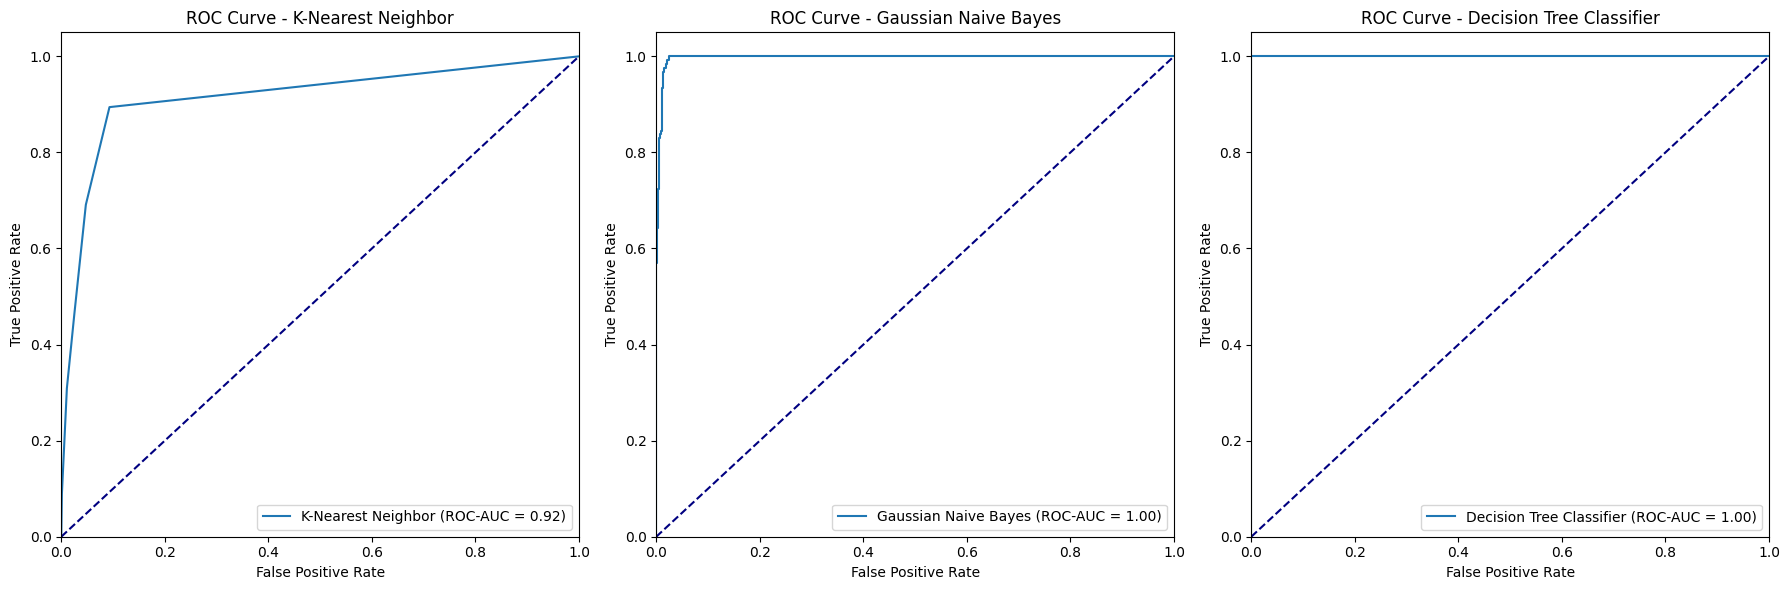

In [227]:
from sklearn.metrics import roc_auc_score, roc_curve

models = [knn, gnb, dtc]  # Pastikan model-model ini sudah didefinisikan dan dilatih sebelumnya
model_names = ['K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Decision Tree Classifier']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for model, name, ax in zip(models, model_names, axes):
    # Binerisasi label
    y_binary = (y_test == np.unique(y_test)[1]).astype(int)  # Mengambil kelas positif dari label

    # Mengambil probabilitas kelas positif dari model
    if isinstance(model, GaussianNB):
        y_score = model.predict_proba(x_test_norm)[:, 1]
    else:
        y_score = model.predict_proba(x_test_norm)[:, 1]  # Ambil probabilitas kelas positif saja

    # Menghitung kurva ROC
    fpr, tpr, _ = roc_curve(y_binary, y_score)

    # Menghitung area di bawah kurva ROC
    roc_auc = roc_auc_score(y_binary, y_score)

    # Plot ROC Curve
    ax.plot(fpr, tpr, label=f'{name} (ROC-AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {name}')
    ax.legend(loc='lower right')

plt.tight_layout()
plt.show()


Kurva ROC dapat membantu kita memilih model klasifikasi terbaik untuk kebutuhan kita. Model dengan AUC yang lebih tinggi dan kurva yang lebih dekat ke sudut kiri atas adalah pilihan yang lebih baik. Pada hasil dari ketiga kurva diatas, menunjukkan bahwa ktiga algoritma optimal dalam memprediksi. Tetapi, bisa dilihat bahwa DTC memiliki nilai 1,0 yang bisa dikatakan sudah sangat optimal

### **Review Process**

**Cross Validation**

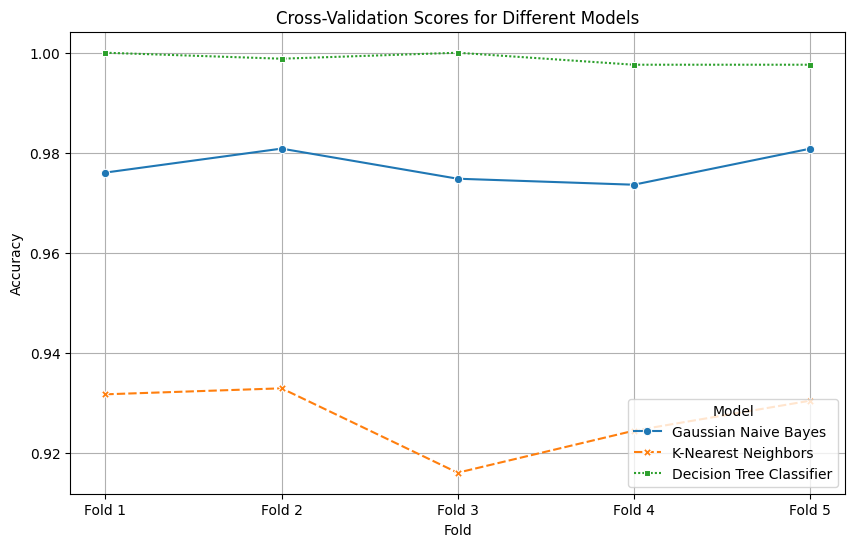

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Inisialisasi model
models = [gnb, knn, dtc]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree Classifier']

# Lakukan validasi silang untuk setiap model
cv_scores = []
for model in models:
    scores = cross_val_score(model, x_train_norm, y_train, cv=5)
    cv_scores.append(scores)

# Buat dataframe dari hasil validasi silang
df_cv_scores = pd.DataFrame(cv_scores, index=model_names).T

# Tampilkan visualisasi hasil validasi silang dengan lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cv_scores, markers=True)
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='Model', loc='lower right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()

Dapat dilihat pada diagram diatas, berdasarkan hasil cross validation dapat disimpukan bahwa algoritma Decision Tree Classifier (DTC) memiliki nilai paling tinggi diantara algortima lainnya. Hal ini dapat memvalidasi bahwa hasil Evaluate Result yang telah dilakukan sebelumnya sesuai dalam menunjukkan algoritma yang paling optimal.

### **Feauture Selection**

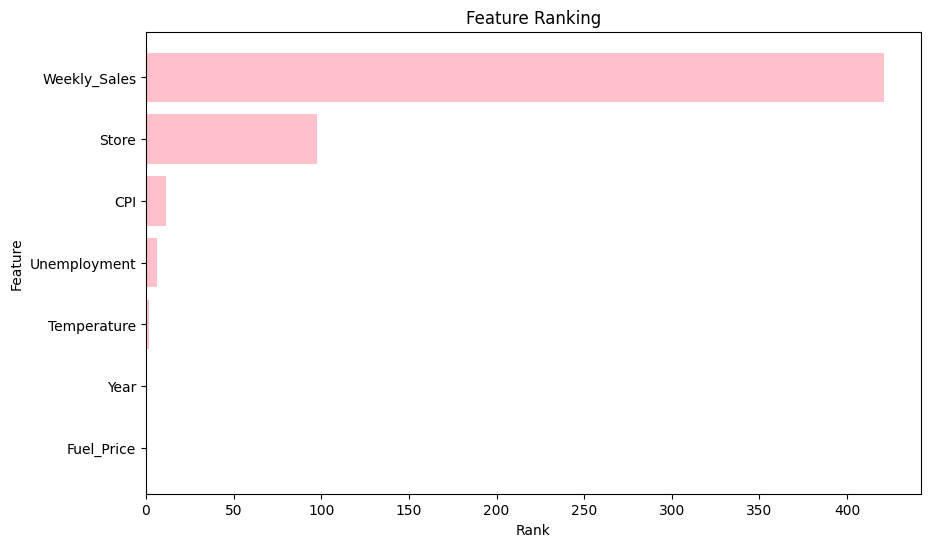

In [229]:
from sklearn.feature_selection import SelectKBest, chi2

# Membuat objek selector untuk memilih fitur terbaik menggunakan chi-squared test
selector = SelectKBest(score_func=chi2, k='all')

# Melatih selector pada data latih
selector.fit(x_train_norm, y_train)

# Mendapatkan skor untuk setiap fitur
feature_ranks = selector.scores_

# Mendapatkan nama-nama fitur
feature_names = x_train.columns

# Membuat DataFrame untuk menampung nama fitur dan skornya
feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

# Mengurutkan DataFrame berdasarkan skor fitur secara menurun
feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

# Membuat plot untuk menampilkan peringkat fitur
plt.figure(figsize=(10, 6))
plt.barh(feature_ranks_df['Feature'], feature_ranks_df['Rank'], color='pink')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking')
plt.gca().invert_yaxis()
plt.show()


Diagram diatas memnunjukkan ranking dari fitur-fitur dari yang paling relevan dengan analisis, hingga yang paling tidak relevan dengan analisi. Dapat disimpulkan berdasarkan hasil diagram diatas, bahwa Weekly Sales merupakan fitur yang paling relevan, diikuti oleh Store, CPI, Unemployment, Temperature, Year, dan yang paling rendah ada Fuel_Price

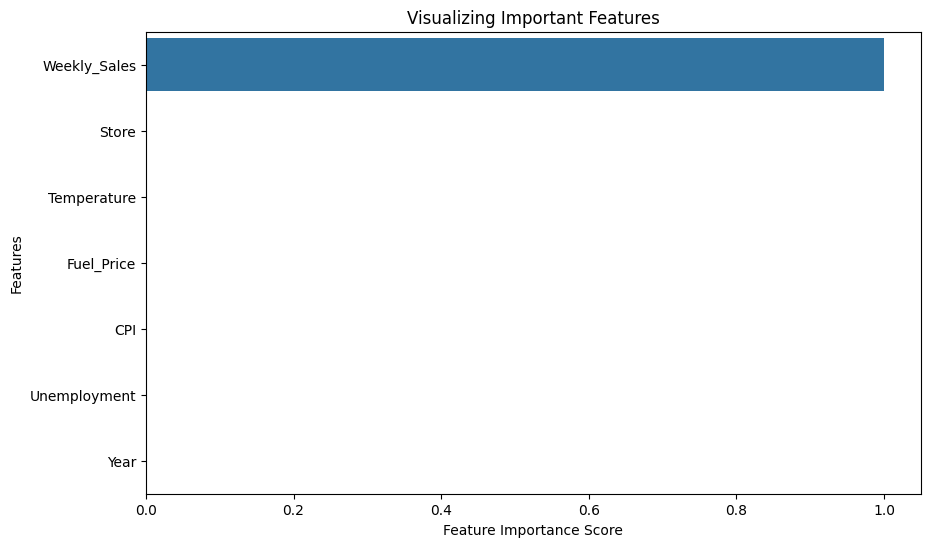

In [230]:
# Mendapatkan nilai penting fitur dari model Decision Tree Classifier (DTC)
feature_imp = pd.Series(dtc.feature_importances_, index=x_train.columns).sort_values(ascending=False)

# Membuat plot untuk menampilkan pentingnya fitur
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

Pada diagram diatas, berdasarkan model DTC bahwa Weekly sales lah satu-satunya fitur yang penting. Karena memang tujuan analisis kali ini untuk meningkatkan penjualan walmart kedepannyam sehingga hasil memang relevan dengan analisis.

### **Tuning Hyperparameter**

**Gaussian Naive Bayes**

In [231]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5)

grid_search.fit(x_train_norm, y_train)

print("Parameter terbaik:", grid_search.best_params_)

y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

acc_before_tuning = gnb.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)

Parameter terbaik: {'var_smoothing': 1.873817422860383e-05}
Akurasi sebelum tuning: 0.9781879194630873
Akurasi setelah tuning: 0.9776286353467561


Berdasarkan hasil tuning dari algoritma GNB diatas, dapat disimpulkan bahwa hasil akurasi sebelum di tuning dan setelah dituning memiliki hasil yang berbeda, yang sebelumnya 0.9781879194630873 menjadi 0.9776286353467561, dikarenakan skor tuningnya menurun dibanding sebelumnya maka tidak perlu menginisialisasikan GNB menggunakan hyperparameter tersebut

**K-Nearest Neighbors'**

In [232]:
# Definisikan grid parameter yang akan ditelusuri
param_grid = {
    'n_neighbors': range(1, 21),  # Coba nilai K dari 1 hingga 20
    'weights': ['uniform', 'distance'],  # Coba kedua jenis bobot
    'p': [1, 2]  # Coba kedua jenis jarak (Manhattan dan Euclidean)
}

# Lakukan pencarian grid dengan cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)

# Lakukan pelatihan pada data latih yang sudah dinormalisasi
grid_search.fit(x_train_norm, y_train)

# Cetak parameter terbaik yang ditemukan
print("Parameter terbaik:", grid_search.best_params_)

# Prediksi menggunakan model terbaik
y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

# Hitung akurasi sebelum penyetelan (tuning)
acc_before_tuning = knn.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

# Hitung akurasi setelah penyetelan (tuning)
acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)


Parameter terbaik: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Akurasi sebelum tuning: 0.9317673378076062
Akurasi setelah tuning: 0.9423937360178971


Berdasarkan hasil tuning dari algoritma KNN diatas, dapat disimpulkan bahwa hasil akurasi sebelum di tuning dan setelah dituning memiliki hasil yang berbeda dan terdapat peningkatan yang dari sebelumnya 0.9317673378076062 menjadi 0.9423937360178971. Dikarenakan meningkat, maka perlu dilakukan inisialisasi menggunakan hyperparameter.

**Decision Tree Clasifier**

In [233]:
# Definisikan grid parameter yang akan ditelusuri
param_grid = {
    'criterion': ['gini', 'entropy'],  # Coba kedua jenis kriteria pemilihan fitur
    'max_depth': [None, 10, 20, 30, 40, 50],  # Coba beberapa kedalaman maksimum
    'min_samples_split': [2, 5, 10],  # Coba beberapa nilai minimum sampel untuk membagi node
    'min_samples_leaf': [1, 2, 4]  # Coba beberapa nilai minimum sampel di leaf node
}

# Lakukan pencarian grid dengan cross-validation
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5)

# Lakukan pelatihan pada data latih yang sudah dinormalisasi
grid_search.fit(x_train_norm, y_train)

# Cetak parameter terbaik yang ditemukan
print("Parameter terbaik:", grid_search.best_params_)

# Prediksi menggunakan model terbaik
y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

# Hitung akurasi sebelum penyetelan (tuning)
acc_before_tuning = dtc.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

# Hitung akurasi setelah penyetelan (tuning)
acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)


Parameter terbaik: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Akurasi sebelum tuning: 1.0
Akurasi setelah tuning: 1.0


Berdasarkan hasil tuning dari algoritma DTC diatas, dapat disimpulkan bahwa hasil akurasi sebelum di tuning dan setelah dituning memiliki hasil yang sama yaitu 1,0

In [234]:
gnb = GaussianNB(var_smoothing=0.43287612810830584)

### **Determine Next Step**

In [242]:
from sklearn.neighbors import KNeighborsClassifier

# Definisikan model KNeighborsClassifier dengan parameter n_neighbors, p, dan weights
knn = KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

# Latih model dengan data latih yang sudah dinormalisasi
knn.fit(x_train_norm, y_train)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

Pada tahapan ini kita akan membuat ulang model dari algoritma GNB atau Gussian Naive Bayes dengan menginisialisasi Gaussian Naive Bayes dan menggunakan parameter terbaik yang kit dapatkan saat melakukan tuning yaitu, n_neighbors=3, p=1, weights='distance'

In [243]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

knn_col_new = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction_new"])
# dtc_col_new = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, knn_col, knn_col_new], axis=1)

In [244]:
combined_data.head()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Year,Sales_Category,knn_prediction,knn_prediction_new
0,11,1250178.89,83.26,2.640,214.695346,7.3460,0,0,0,0
1,5,359206.21,60.66,3.630,221.434215,5.9430,2,0,0,0
2,45,753447.05,55.82,3.583,187.483796,8.5230,1,0,0,0
3,23,1552886.59,43.60,3.501,136.490933,4.4200,1,1,0,0
4,12,945823.65,50.43,3.599,130.157516,11.2185,2,0,0,0


Berdasarkan hasil dari prediksi terbaru, dapat dilihat bahwa hasil prediksi sebelumnya sama dengan hasil prediksi terbaru

### **Kesimpulan**

Dari evaluasi di atas, dapat disimpulkan bahwa algoritma terbaik untuk melakukan klasifikasi pada analisis ini adalah algoritma DTC dan GNB, Yang memiliki nilai yang optimal.


---


dan setelah melakukan tunnning hyperparameter kita mendapatkan bahwa algoritma GNB dan KNN perlu di modelling ulang menggunakan data train dan data test, dan dimasukkan kedalam kolom baru.